Mounted at /content/drive
Number of Compounds: 34
Number of Spectrum: 42
Total Number of Spectra: 1428
Front trim : 50.0
End trim : 34.0
Data Start Input: 450
Data End Input: 3966
Sample Size of training data: 3601
Rows discarded: 0
Loading H2O... 
H2O Data in Memory 
Original samplesize: 3601
Corrected samplesize: 3517
Loading CO2... 
CO2 Data in Memory 
Loading O3... 
O3 Data in Memory 
Loading N2O... 
N2O Data in Memory 
Loading CO... 
CO Data in Memory 
Loading CH4... 
CH4 Data in Memory 
Loading NO... 
NO Data in Memory 
Loading SO2... 
SO2 Data in Memory 
Loading NO2... 
NO2 Data in Memory 
Loading NH3... 
NH3 Data in Memory 
Loading HNO3... 
HNO3 Data in Memory 
Loading HF... 
HF Data in Memory 
Loading HCl... 
HCl Data in Memory 
Loading HF... 
HBr Data in Memory 
Loading HI... 
HI Data in Memory 
Loading OCS... 
OCS Data in Memory 
Loading H2CO... 
H2CO Data in Memory 
Loading HOCl... 
HOCl Data in Memory 
Loading HCN... 
HCN Data in Memory 
Loading CH3Cl... 
CH3Cl Data in Mem

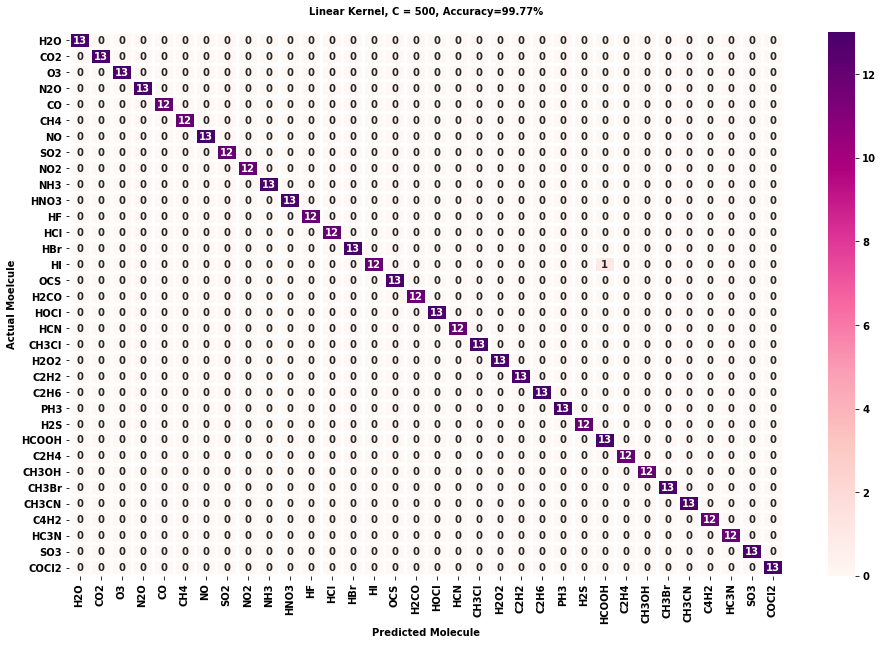

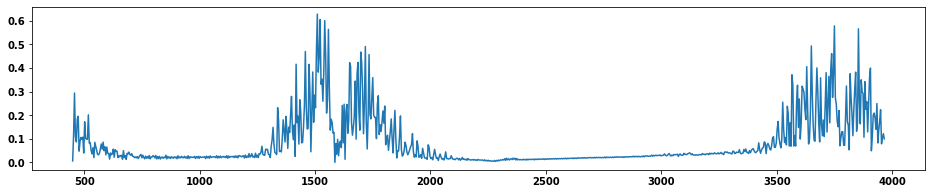

Min Wavenumber (resampled):  450.0
Max Wavenumber (resampled):  3966.0
OVR (SVM-linear) says : [0] so molecule is  H2O


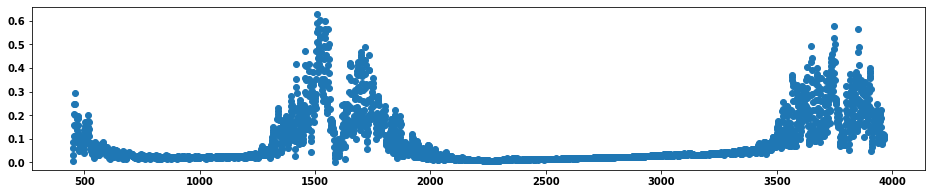

In [ ]:
#SVM IR Spectra Classifier
#Author: M. Arshad Zahangir Chowdhury
#Manuscript : A Support Vector Machines Framework for Identification of Infrared Spectra
# by M. Arshad Zahangir Chowdhury, Timothy E. Rice, and Matthew A. Oehlschlaeger
#July 2, 2021 

### Instructions ###

# This notebook reads the input data from user's google drive
# Download the folder "IR_DATA_1wvnstep_10um_decades_Ex" from Github and copy it to user's google drive
# Download the "H2O-4-NIST.xlsx" experimental spectrum from Github and copy it to user's google drive
# When the program is run for the first time, user must authenticate to allow it to use the user's google drive
# Once authenticated the program will run and should identify the spectrum belonging to the H2O class

# Alternatively, user can download this code and the data and run it locally by changing the path variables pathMaster and path_exp



%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  
import glob 
from scipy import signal
from scipy import interpolate
from sklearn.metrics import *
import datetime

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

pathMaster = r'/content/drive/My Drive/IR_DATA_1wvnstep_10um_decades_Ex/' #Resolution = 1 per cm 

path_exp = "/content/drive/My Drive/"

#Set start and end frequencies of training to match experimental spectra
data_start=450 #1/cm
wv_resolution = 1 #resolution of training data (cannot be changed)
data_end= 3966 #1/cm


#Assemble data

t_start = datetime.datetime.now()


n_compounds=34 # total no. of compounds
n_spectrum=42 # total no. of individual spectrum for a single compound
n_spectra=n_compounds*n_spectrum # Total number of spectra

print('Number of Compounds:', n_compounds)
print('Number of Spectrum:', n_spectrum)
print('Total Number of Spectra:', n_spectra)

front_trim_amount = (data_start - 400)/wv_resolution 
print("Front trim :", front_trim_amount)

end_trim_amount = (4000- data_end)/wv_resolution 
print("End trim :", end_trim_amount)


print('Data Start Input:',data_start)
print('Data End Input:',data_end)

n_discard_rows=0
samplesize=3601-n_discard_rows #discard rows (obsolete)

print('Sample Size of training data:', samplesize)
print('Rows discarded:', n_discard_rows)


path_H2O = r'/H2O'
path_CO2 = r'/CO2'
path_O3 = r'/O3'
path_N2O = r'/N2O'
path_CO = r'/CO'
path_CH4 = r'/CH4'
path_NO = r'/NO'
path_SO2 = r'/SO2'
path_NO2 = r'/NO2'
path_NH3 = r'/NH3'
path_HNO3 = r'/HNO3'
path_HF = r'/HF'
path_HCl = r'/HCl'
path_HBr = r'/HBr'
path_HI = r'/HI'
path_OCS = r'/OCS'
path_H2CO = r'/H2CO'
path_HOCl = r'/HOCl'
path_HCN = r'/HCN'
path_CH3Cl = r'/CH3Cl'
path_H2O2 = r'/H2O2'
path_C2H2 = r'/C2H2'
path_C2H6 = r'/C2H6'
path_PH3 = r'/PH3'
path_H2S = r'/H2S'
path_HCOOH = r'/HCOOH'
path_C2H4 = r'/C2H4'
path_CH3OH = r'/CH3OH'
path_CH3Br = r'/CH3Br'
path_CH3CN = r'/CH3CN'
path_C4H2 = r'/C4H2'
path_HC3N = r'/HC3N'
path_SO3 = r'/SO3'
path_COCl2 = r'/COCl2'

path=pathMaster+path_H2O
print('Loading H2O... ')    
all_files = glob.glob(path + "/*.csv")

li = []
idx=0
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]

    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]

    
    dfx=dfx.astype(np.float)
    
    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    if idx==0:
        Temporary = np.empty((n_spectra, 1, shoretend_samplesize))
    
    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('H2O Data in Memory ')    
print('Original samplesize:',samplesize)
print('Corrected samplesize:',shoretend_samplesize)    

path=pathMaster+path_CO2
print('Loading CO2... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:] 
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    
    dfx=dfx.astype(np.float)
    
    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('CO2 Data in Memory ')    
        

path=pathMaster+path_O3
print('Loading O3... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  
    
    df=df.values[n_discard_rows:] 
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('O3 Data in Memory ')    
    

    
path=pathMaster+path_N2O
print('Loading N2O... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('N2O Data in Memory ')    



path=pathMaster+path_CO
print('Loading CO... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('CO Data in Memory ')    



path=pathMaster+path_CH4
print('Loading CH4... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('CH4 Data in Memory ')    


path=pathMaster+path_NO
print('Loading NO... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    

    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('NO Data in Memory ')    


path=pathMaster+path_SO2
print('Loading SO2... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    

    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1

    
print('SO2 Data in Memory ')        
    


path=pathMaster+path_NO2
print('Loading NO2... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
print('NO2 Data in Memory ') 

path=pathMaster+path_NH3
print('Loading NH3... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
print('NH3 Data in Memory ') 


path=pathMaster+path_HNO3
print('Loading HNO3... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('HNO3 Data in Memory ') 


path=pathMaster+path_HF
print('Loading HF... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('HF Data in Memory ') 

path=pathMaster+path_HCl
print('Loading HCl... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('HCl Data in Memory ') 

path=pathMaster+path_HBr
print('Loading HF... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('HBr Data in Memory ') 

path=pathMaster+path_HI
print('Loading HI... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('HI Data in Memory ') 

path=pathMaster+path_OCS
print('Loading OCS... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('OCS Data in Memory ') 


path=pathMaster+path_H2CO
print('Loading H2CO... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)


    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('H2CO Data in Memory ') 

path=pathMaster+path_HOCl
print('Loading HOCl... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('HOCl Data in Memory ') 




path=pathMaster+path_HCN
print('Loading HCN... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('HCN Data in Memory ') 

path=pathMaster+path_CH3Cl
print('Loading CH3Cl... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('CH3Cl Data in Memory ') 

path=pathMaster+path_H2O2
print('Loading H2O2... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('H2O2 Data in Memory ') 


path=pathMaster+path_C2H2
print('Loading C2H2... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('C2H2 Data in Memory ') 

path=pathMaster+path_C2H6
print('Loading C2H6... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('C2H6 Data in Memory ') 

path=pathMaster+path_PH3
print('Loading PH3... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:] 
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('PH3 Data in Memory ') 

path=pathMaster+path_H2S
print('Loading H2S... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('H2S Data in Memory ') 

path=pathMaster+path_HCOOH
print('Loading HCOOH... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('HCOOH Data in Memory ') 

path=pathMaster+path_C2H4
print('Loading C2H4... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('C2H4 Data in Memory ') 


path=pathMaster+path_CH3OH
print('Loading CH3OH... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('CH3OH Data in Memory ')

path=pathMaster+path_CH3Br
print('Loading CH3Br... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    
    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) #Arrange absorbance values as features and keep them in temporary
    idx=idx+1
    
print('CH3Br Data in Memory ') 

path=pathMaster+path_CH3CN
print('Loading CH3CN... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('CH3CN Data in Memory ') 

path=pathMaster+path_C4H2
print('Loading C4H2... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  
    
    
    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 
    
    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('C4H2 Data in Memory ') 

path=pathMaster+path_HC3N
print('Loading HC3N... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  
     
    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 
    
    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('HC3N Data in Memory ') 

path=pathMaster+path_SO3
print('Loading SO3... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)
    
    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)


    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    
print('SO3 Data in Memory ') 

path=pathMaster+path_COCl2
print('Loading COCl2... ')    
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)  

    df=df.values[n_discard_rows:]  
    dfx=df[:,0] 
    dfy=df[:,1] 

    dfx_store=dfx[:int(samplesize-end_trim_amount)]
    dfx=dfx_store[int(front_trim_amount):]
    dfy_store=dfy[:int(samplesize-end_trim_amount)]
    dfy=dfy_store[int(front_trim_amount):]
    
    dfx=dfx.astype(np.float)

    dfy=dfy.astype(np.float)

    shoretend_samplesize=len(dfx)

    Temporary[idx]=dfy.reshape(1, shoretend_samplesize) 
    idx=idx+1
    

print('COCl2 Data in Memory ') 

t_end = datetime.datetime.now()
delta = t_end - t_start
Time_Loading=delta.total_seconds() * 1000

print('Data loading time (milliseconds):', Time_Loading)


wavenumbers=dfx
X=Temporary.reshape(n_spectra, shoretend_samplesize)


labels = ['H2O','CO2','O3','N2O','CO',
         'CH4','NO','SO2','NO2','NH3',
          'HNO3','HF','HCl','HBr','HI',
          'OCS','H2CO','HOCl','HCN','CH3Cl',
          'H2O2','C2H2','C2H6','PH3','H2S',
          'HCOOH','C2H4','CH3OH','CH3Br','CH3CN',
          'C4H2','HC3N','SO3','COCl2'
         ]


label_id = np.array([0,1,2,3,4,
                     5,6,7,8,9,
                     10,11,12,13,14,
                    15,16,17,18,19,
                    20,21,22,23,24,
                    25,26,27,28,29,
                    30,31,32,33]) 

Store_y=np.array([])
for ele_in_label_id in np.nditer(label_id): 
   
    for elem_images in range(n_spectrum):

        Store_y=np.append(Store_y, ele_in_label_id)


y=Store_y.astype(np.int)  

print('shape of features:', X.shape)
print('shape of labels:', y.shape)

#70-30 Split

TRAIN_SIZE=0.70
TEST_SIZE=1-TRAIN_SIZE

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=TRAIN_SIZE,
                                                   test_size=TEST_SIZE,
                                                   random_state=123,
                                                   stratify=y
                                                   )

print("All:", np.bincount(y) / float(len(y))*100  )
print("Training:", np.bincount(train_y) / float(len(train_y))*100  )
print("Testing:", np.bincount(test_y) / float(len(test_y))*100  )

#OneVsRest (SVM-Linear Kernel)


t_start = datetime.datetime.now()

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

classifier_OVR = OneVsRestClassifier(SVC(kernel='linear',C = 500, decision_function_shape = 'ovo',random_state=1)).fit(train_X, train_y)

pred_y = classifier_OVR.predict(test_X)

print("Fraction Correct[Accuracy]:")
print(np.sum(pred_y == test_y) / float(len(test_y)))
FCA_OVR=np.sum(pred_y == test_y) / float(len(test_y))

cm_OVR = confusion_matrix(test_y, pred_y)

plt.rc('font', weight='bold')
fig = plt.figure(figsize=(16,10));

ax = sns.heatmap(cm_OVR,linewidths=2, annot=True, cmap='RdPu');  

ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
plt.xlabel('Predicted Molecule',fontsize='medium', fontweight='bold');
plt.ylabel('Actual Moelcule',fontsize='medium', fontweight='bold');
plt.xticks(rotation=90);
plt.yticks(rotation=0);
plt.title('Linear Kernel, C = 500, Accuracy={0:0.2f}%\n'.format(FCA_OVR*100), fontsize='medium', fontweight='bold');
fig.savefig('Linear Kernel.jpg', bbox_inches='tight',dpi=300)

from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

t_end = datetime.datetime.now()
delta = t_end - t_start
Time_OVR=delta.total_seconds() * 1000

print('Time elaspsed: ', Time_OVR) # milliseconds    

#Identify experimental spectrum

df_H2O = pd.read_excel(path_exp+"/H2O-4-NIST.xlsx", sheet_name="Sheet1")
df_H2O.columns = ['wavenumbers', 'absorbance'] 
plt.figure(figsize=(16, 3))
plt.plot(df_H2O['wavenumbers'],df_H2O['absorbance'])
print("Min Wavenumber: ", min(df_H2O['wavenumbers']))
print("Max Wavenumber: ", max(df_H2O['wavenumbers']))
print("Available data points:", len(df_H2O['wavenumbers'].to_numpy()))
plt.show()

from scipy import interpolate

f = interpolate.interp1d(df_H2O['wavenumbers'].to_numpy(), df_H2O['absorbance'].to_numpy())

dfy_resampled = f(wavenumbers) 
dfx_resampled = wavenumbers

plt.figure(figsize=(16, 3))
plt.scatter(dfx_resampled,dfy_resampled)

print("Min Wavenumber (resampled): ", min(dfx_resampled))
print("Max Wavenumber (resampled): ", max(dfx_resampled))

Unknown_X=dfy_resampled.reshape(1, shoretend_samplesize) 

pred_unknown_y_OVR = classifier_OVR.predict(Unknown_X)
print('OVR (SVM-linear) says :', pred_unknown_y_OVR, 'so molecule is ',labels[pred_unknown_y_OVR[0]])